***Welcome! Hello!***

We are glad you're here 👏! And are excited to get you started 🚦!

This notebook exists to enable you to log (aka dump) some CAN traffic and to filter what is received.

# How To Use

It does this with `python` BUT don't worry: you don't need to know `python` to use this notebook.

Start by running the cells (the jupyter name for these boxes 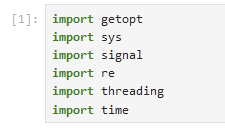).

Run all cells in both *1. Basic Imports* and *2. Scapy Setup* sections below:
1. click the cell
2. click the run button 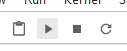 (or shift+enter)

Then move to the *Do the thing:* section and run those cells too 🚀!

## 1. Basic Imports

In [ ]:
import getopt
import sys
import signal
import re
import threading
import time

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = 'all'

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

import pandas as pd
import qgrid

qgrid.enable()

## 2. `scapy` Setup

We've done the basic imports. Now we need to setup `scapy` automotive CAN stuff.

Just like in a `scapy` interactive session [documented here](https://scapy.readthedocs.io/en/latest/layers/automotive.html) the statements in the following cell will work to get the right stuff imported for use here in this notebook.

In [ ]:
from scapy.all import *

load_layer("can")
conf.contribs['CANSocket'] = {'use-python-can': True}
load_contrib('cansocket')

(you may get a warning about wireshark stuff, don't worry about it)

### aside: scripting python tip

BUT even though the above imports wil _work_ they aren't ideal for using a Python IDE to do development. When using those IDEs one of the primary benefits is the static analysis of the code to predict method names and arguments. To get that functionality you should use something like this instead (NB: don't run both these cells uncommented).

So this cell contents would be best for making your own scripts from what's in this repo or if you're lucky enough to have an IDE that works with jupyter notebooks.

In [ ]:
# import scapy.libs.six as six
# from scapy.config import conf
# from scapy.consts import LINUX
# from scapy.sendrecv import sniff
#
# if six.PY2 or not LINUX or conf.use_pypy:
#     conf.contribs['CANSocket'] = {'use-python-can': True}
#
# from scapy.contrib.cansocket import CANSocket, PYTHON_CAN  # noqa: E402
# from scapy.contrib.isotp import ISOTPSocket
#
# from scapy.contrib.automotive.uds import UDS
# from scapy.supersocket import SuperSocket

# Do the thing: CAN Logging

These next cells create 'interactive' elements where you can change settings and repeat the can log.

Run the cell and you will see the interactive part 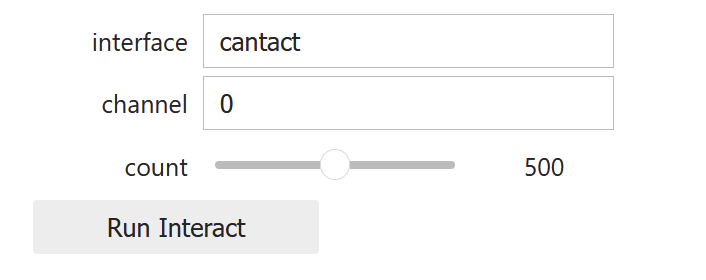
* interface: set to the python-can interface setting (-i argument on command line)
* channel: set to the python-can channel setting (-c argument on command line)

e.g. 'slcan' + "COM27' or 'cantact' + '0'

* count: set to the number of can frames to capture. The maximum is capped at 1000 but can be increased. The default is 50% of the maximum , which you may want to reduce for the first test.

Configure those settings and then click 'Run Interact'

This one prints in 'candump format.'


In [ ]:
@interact_manual
def canlog(interface='cantact', channel='0', count=(0, 1000, 4)):
    with CANSocket(interface=interface, channel=channel) as csock:
        sniff(count=count, opened_socket=csock,
              prn=lambda pkt: print(f'({pkt.time:010.06f}) {interface}{channel} {pkt.identifier:03x}#{pkt.data.hex()}'))

you may get warnings about "SocketWrapper was not properly shut down"; that's ok

---

This next one will display an interactive table of the captured CAN frames.

Same as above: run the cell and then you can adjust the interface, channel, and count settings and repeat the capture with the `run interact` button.

In [ ]:
@interact_manual
def canlog(interface='cantact', channel='0', count=(0, 1000, 4)):
    with CANSocket(interface=interface, channel=channel) as csock:
        frames_list = sniff(count=count, opened_socket=csock)
        df = pd.DataFrame({
            'time': [getattr(pkt, 'time') for pkt in frames_list],
            'id': [getattr(pkt, 'identifier') for pkt in frames_list],
            'id_hex': [hex(getattr(pkt, 'identifier')) for pkt in frames_list],
            'data': [getattr(pkt, 'data') for pkt in frames_list],
            'data_hex': [getattr(pkt, 'data').hex() for pkt in frames_list]
        })

    display(df)

you may get warnings about "SocketWrapper was not properly shut down"; that's ok

# Appendix: Installing Dependencies

run these commands to install any missing packages

In [ ]:
!pip install -U -q ipywidgets


In [ ]:
!jupyter nbextension enable --py widgetsnbextension

In [ ]:
!pip install -U pandas

In [ ]:
!pip install -U qgridnext